Donner le mot à chercher
Mark
Mark
14
Results found in file a-0.png : 



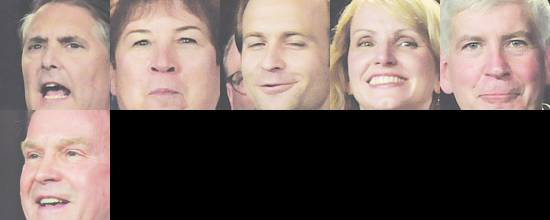

Results found in file a-1.png : 



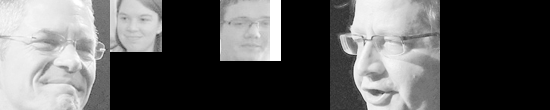

Sorry !! There were no faces in that file!
Results found in file a-13.png : 



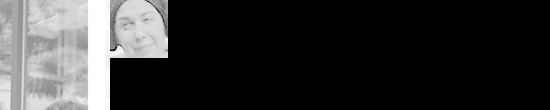

Results found in file a-2.png : 



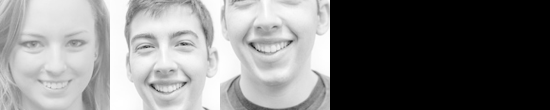

Results found in file a-3.png : 



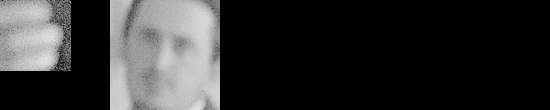

Results found in file a-5.png : 



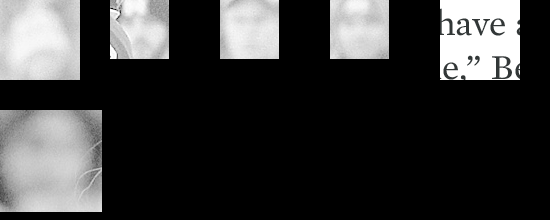

Sorry !! There were no faces in that file!
Results found in file a-9.png : 



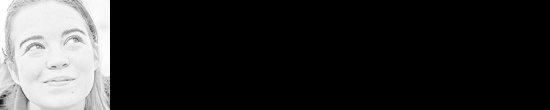

'\nYour task is to write python code\nwhich allows one to search through the images\nlooking for the occurrences of keywords and faces\n\nE.g. if you search for "pizza",\nit will return a contact sheet of all of the faces\nwhich were located on the newspaper page which mentions "pizza".\n'

In [2]:
import zipfile

from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np

word = input("Donner le mot à chercher\n")
print(word)
word=word.lower()

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

d={}

#with zipfile.ZipFile("readonly/small_img.zip", 'r') as f:
with zipfile.ZipFile("readonly/images.zip", 'r') as f:
    File_Name = [file.filename for file in f.infolist() ]
    for file in File_Name:
        
        image=Image.open(f.open(file))
        text = pytesseract.image_to_string(image)
        d[file]=(image,text.lower())

def print_faces(image,faces):
    MAX_SIZE = (110, 110) 
    nb_lignes= len(faces)//5
    if len(faces) % 5 != 0 :
        nb_lignes+=1
  

    contact_sheet=Image.new(image.mode, (5*110,nb_lignes*110))
    x=0
    y=0
    for box in faces :
        a,b,w,h=box
        area = image.crop((a,b,a+w,b+h))
        #area=np.array(image)[a:a+w+1,y:y+h+1]
        #area=Image.fromarray(area)
        area.thumbnail(MAX_SIZE)
        contact_sheet.paste(area, (x, y) )
        if x+110 == contact_sheet.width:
            x=0
            y=y+110
        else:
            x=x+110
        
    display(contact_sheet)
        
print(len(d))
for file in File_Name :
    if word in d[file][1] :
        faces = face_cascade.detectMultiScale(np.array(d[file][0]),1.35,4)
        if len(faces)== 0 :
            print("Sorry !! There were no faces in that file!")
        else :
            print("Results found in file " + file +" : \n")
            print_faces(d[file][0],faces)
            
            

'''
Your task is to write python code
which allows one to search through the images
looking for the occurrences of keywords and faces

E.g. if you search for "pizza",
it will return a contact sheet of all of the faces
which were located on the newspaper page which mentions "pizza".
'''

# '''
# your ability to use zipfile library
# your ability to use OpenCV to detect faces,
# your ability to use tesseract to do optical character recognition, and
# your ability to use PIL to composite images together into contact sheets.
# '''

# HINT 1
# To access the newspapers in the zipfile, you must first use the Zipfile library
# to open the zipfile then iterate through the objects (newspapers) in the zipfile using .infolist().
# Try and write a simple routine to just go through the zipfile,
# printing out the name of the file as well as using display().
# Remember that the PIL.Image library can .open() files, and that items in .infolist() in the zipfile each
# appear to Python just as if they were a file (these are called "file-like" objects).

# HINT 2
# You can spend a lot of time converting between PIL.Image files and byte arrays, but you don't have to.
# Why not just store the PIL.Image objects in a global data structure, maybe a list or a dictionary indexed by name?
# Then you can further process this data structure,
# by adding in information such as the text detected on the pages or the bounding boxes behind faces.
# Come to think of it, a list of dictionary objects, where each entry in the list would have the PIL image,
# the bounding boxes, and the text discovered on the page, would be a handy way to store this data.

# HINT 3
# A quick reminder - in Python all strings are just like lists of characters.
# Kind of (remember they are immutable lists - more like tuples!).
# But this means you can use the in keyword to find substrings really easily.
# So the following statement w ill return True if the substring is matched: if "Christopher" in my_text

# HINT 4
# Creating the contact sheet can be a bit of a pain.
# But you can resize images without having to worry about the aspect ratio
# if you use the PIL.Image.thumbnail function.
# I used it when creating out the output images, maybe you should too! 
# And check out the lecture on the contact sheet, you want to be careful that you don't
# "walk off" the end of the images when creating a row (or column).

# Each page of the newspapers is saved as a single PNG image in a file
# These newspapers are in english, and contain a variety of stories, advertisements and images